In [53]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
import time
from datetime import datetime
import time
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [54]:
Data = pd.read_csv('Pressure_with_Anomaly_2.csv')

In [55]:
# preprocess 'time' to timedate objects
Data['timestamp'] = pd.to_datetime(Data['timestamp'])

In [56]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [57]:
Data['hours'] = Data['timestamp'].dt.hour
Data['mins'] = Data['timestamp'].dt.minute
Data['year'] = Data['timestamp'].dt.year
Data['month'] = Data['timestamp'].dt.month
Data['day'] = Data['timestamp'].dt.day

In [102]:
# An estimation of anomly population of the dataset (necessary for several algorithm)
outliers_fraction = 0.1

In [103]:
# extracting time as an integer
Data['time_epoch'] = (Data['timestamp'].astype(np.int64)/100000000000).astype(np.int64)

C:\Users\Mnesoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [60]:
from sklearn.preprocessing import LabelEncoder
encoded = LabelEncoder()
encoded.fit(Data['year'])
Data['year'] = encoded.transform(Data['year'])

In [61]:
Data.head()

,timestamp,value,hours,mins,year,month,day,time_epoch
0,2018-10-04 00:00:00,19.19495,0,0,0,10,4,15386112
1,2018-10-04 00:27:00,19.04453,0,27,0,10,4,15386128
2,2018-10-04 00:28:00,19.26260,0,28,0,10,4,15386128
3,2018-10-04 00:37:00,19.05637,0,37,0,10,4,15386134
4,2018-10-04 00:46:00,19.25317,0,46,0,10,4,15386139


In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
Data['value'] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(Data['value'])), columns = ['value'])

In [94]:
data = Data[['value']]

data = pd.DataFrame(data)

In [104]:
model = IsolationForest(contamination = outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.1)

In [105]:
Data['anomaly25'] = pd.Series(model.predict(data))
Data['anomaly25'] = Data['anomaly25'].map( {1: 0, -1: 1} )
print(Data['anomaly25'].value_counts())

0    61859
1     6863
Name: anomaly25, dtype: int64


C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


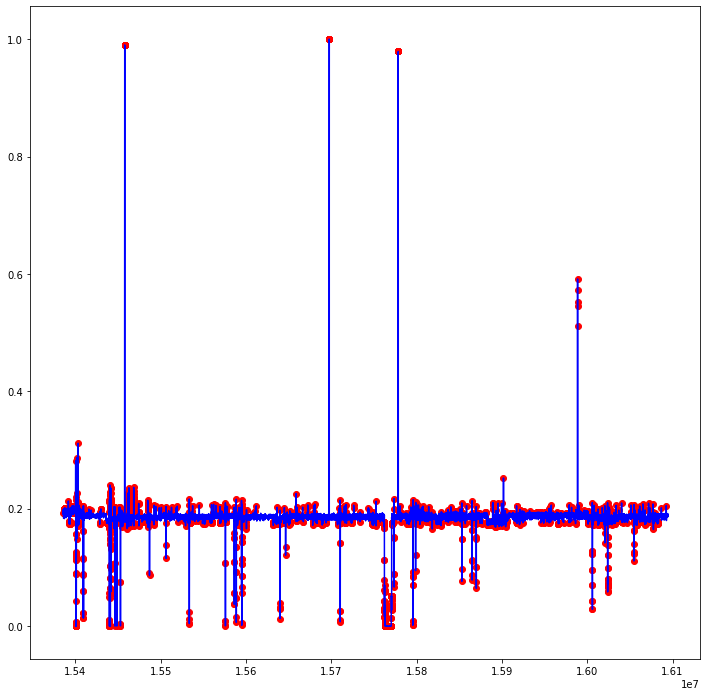

In [106]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots(figsize = (12,12))
a = Data.loc[Data['anomaly25'] == 1, ['time_epoch', 'value']] #anomaly
ax.plot(Data['time_epoch'], Data['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

C:\Users\Mnesoma\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


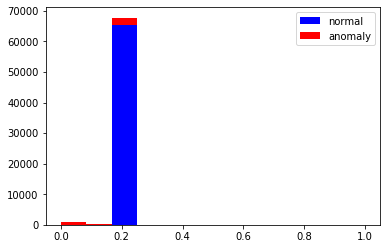

In [77]:
# visualisation of anomaly with pressure repartition (viz 2)
a = Data.loc[Data['anomaly25'] == 0, 'value']
b = Data.loc[Data['anomaly25'] == 1, 'value']
fig, axs = plt.subplots()
axs.hist([a,b], bins=12, stacked=True, color=['blue', 'red'], label = ['normal',
'anomaly'])
plt.legend()
plt.show()